In [49]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [50]:
df_bt = pd.read_json('/Users/trevor/Desktop/Research/climate-trends/unique_english_abstract_not_null_bertopic_embeddings.json')

In [14]:
df_bt.shape
# 91,153 abstracts

(91153, 55)

In [51]:
df_bt.columns

Index(['Unnamed: 0', 'created', 'license', 'publisher', 'published-online',
       'author', 'page', 'indexed', 'special_numbering', 'assertion', 'editor',
       'relation', 'score', 'issued', 'volume', 'source', 'update-policy',
       'updated-by', 'deposited', 'archive', 'is-referenced-by-count',
       'alternative-id', 'prefix', 'DOI', 'language', 'abstract', 'resource',
       'member', 'issue', 'link', 'ISSN', 'content-domain', 'published-print',
       'type', 'short-container-title', 'journal-issue', 'references-count',
       'subtitle', 'published-other', 'original-title', 'reference-count',
       'published', 'title', 'container-title', 'reference', 'funder',
       'issn-type', 'article-number', 'URL', 'cleaned_abstract',
       'earliest_pub_year', 'topic', 'probability', 'Name', 'embedding'],
      dtype='object')

In [52]:
small_df = df_bt[['DOI', 'topic', 'probability', 'Name', 'embedding']]

In [53]:
small_df.to_csv('/Users/trevor/Desktop/Research/climate-trends/topics_embeddings.csv')

In [54]:
def clean_topic_names(name):
    removed_number = re.sub(r"\d+_", "", name)
    underscores_removed = re.sub("_", ", ", removed_number)
    return underscores_removed

In [55]:
df_bt['Name_cleaned'] = df_bt['Name'].apply(clean_topic_names)

In [56]:
df_bt['Name_cleaned']

0            -climate, change, climate change, model
1                              bp, holocene, cal, ka
2            -climate, change, climate change, model
3            -climate, change, climate change, model
4            -climate, change, climate change, model
                            ...                     
91148                laser, plasma, pulse, co2 laser
91149        -climate, change, climate change, model
91150        -climate, change, climate change, model
91151                           ci, 95 ci, incidence
91152    flowering, phenological, phenology, species
Name: Name_cleaned, Length: 91153, dtype: object

In [78]:
off_topics = ['safety, school, organizational, employees', 'vibrational, corotational, spectra', 'extraction, extracts, extract, supercritical'
'laser, plasma, pulse, co2 laser', 'nema, , ,', 'laser, patients, co2 laser, treatment','ci, 95 ci, incidence', 'patients, etcoarterial, mmhg',
'isbn, isbn paperback', 'des, du, dans, une', 'via link top, via link, link top, link top via','zu, werden, ist, das',
'vitrification, pregnancy, embryos, blastocysts', 'embryos, oocytes, vitrified, vitrification', 'available available, refs, available available available, available',
'las, que, para, una', 'curr, rm, circ, text',
'bu, bir, iklim, ile','linked pdf, linked pdf, pdf versions error, linked pdf versions, versions error', 'original version, corrected pdf, corrected pdf versions, original',
'original publication, publication, original, figure', 'guest, clathrate, molecules, guest molecules', 'see, see perspective, see also, science',
'reports, argue, 10 1002', 'magnetic, spin, heusler, fe', 'neurons, cortn, cx26', 'zfpmice, cells, cell', 'rats, breathing, chc, ventilatory',
'journal, botany, online, 2022','mmake following, wish make following, wish make, wish', 'gt lt, lt, gt, sub gt', 'categorized, gt, climate change categorized, change categorized',
'curr, rm, circ, text', 'correction correction 10 10 1038', 'scientific reports number, reports number, scientific reports, updated', 
'awards, atmospheric sciences, sciences section, atmospheric sciences section',
'resolution file, download, file, please', 'prize, agu, climate communication prize, communication prize',
'-climate, change, climate change, model']

In [79]:
df_bt_c = df_bt[~df_bt['Name_cleaned'].isin(off_topics)]

In [85]:
df_bt_c.shape

(32988, 56)

In [86]:
for name, val in df_bt_c.value_counts('Name_cleaned').items():
    print(name, val)

bp, holocene, cal, ka 3468
political, media, climate change, social 1345
ice, model, aerosol, sea 1174
vegetation, china, ndvi, precipitation 1064
farmers, adaptation, households, household 865
breeding, survival, population, birds 681
pacific, anomalies, anomalous, niño 665
soil, microbial, warming, litter 630
genetic, populations, species, diversity 615
groundwater, water, streamflow, runoff 597
building, thermal, comfort, buildings 549
urban, adaptation, measures, planning 448
injection, cooil, reservoir 444
co2 emissions, emissions, economic growth, energy 408
soil, ha, yield, kg 405
rcm, bias, precipitation, resolution 394
co2 emissions, emissions, china, carbon 392
fire, pine, tree, forest 388
elevated, elevated cocoleaf 350
crop, crops, plant, breeding 343
pcoacidification, ph, elevated 343
cu, co2 reduction, co, photocatalytic 336
responses, species, interactions, ecological 329
model, models, ensemble, data 309
tax, policy, emissions, welfare 306
suitable, distribution, habita

In [98]:
topic_values = pd.DataFrame(df_bt_c.value_counts('Name_cleaned'))

In [102]:
median_topic_count = np.percentile(topic_values.values, 50)

In [103]:
median_topic_count

24.5

In [111]:
top10 = list(topic_values.index[0:10])

In [112]:
top10

['bp, holocene, cal, ka',
 'political, media, climate change, social',
 'ice, model, aerosol, sea',
 'vegetation, china, ndvi, precipitation',
 'farmers, adaptation, households, household',
 'breeding, survival, population, birds',
 'pacific, anomalies, anomalous, niño',
 'soil, microbial, warming, litter',
 'genetic, populations, species, diversity',
 'groundwater, water, streamflow, runoff']

In [113]:
top10_df = df_bt_c[df_bt_c['Name_cleaned'].isin(top10)]

In [114]:
top10_df_by_year = top10_df.groupby(['earliest_pub_year', 'Name_cleaned']).size().unstack(fill_value=0)

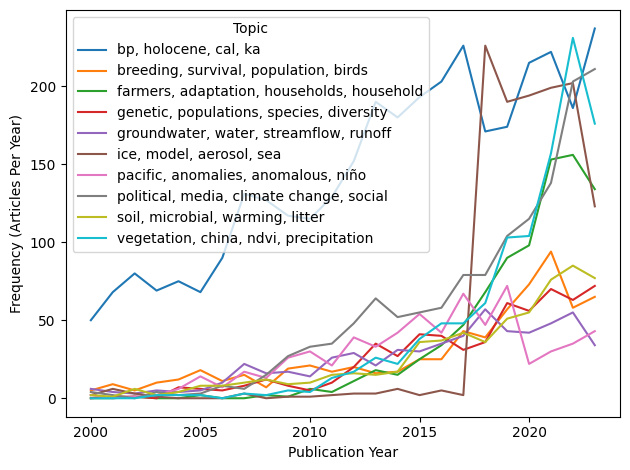

In [115]:
top10_df_by_year.plot(kind = "line")
plt.xlabel('Publication Year')
plt.ylabel('Frequency (Articles Per Year)')
plt.legend(title = 'Topic', loc = 'upper left')
plt.tight_layout()
plt.show()

In [117]:
df_bt_by_year = df_bt_c.groupby(['Name_cleaned', 'earliest_pub_year']).size().unstack(fill_value=0)

In [118]:
df_bt_by_year['change'] = df_bt_by_year.iloc[:,6:].apply(np.mean, axis = 1) / df_bt_by_year.iloc[:,:5].apply(np.mean, axis = 1)

In [119]:
df_bt_by_year[(df_bt_by_year.sum(axis = 1) >= median_topic_count) & (df_bt_by_year['change'] < np.inf)].sort_values('change', ascending = False)

earliest_pub_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,change
Name_cleaned,,,,,,,,,,,,,,,,,,,,,
"farmers, adaptation, households, household",0,0,1,0,0,2,0,0,2,1,...,25,34,47,68,90,98,153,156,134,239.444444
"urban, adaptation, measures, planning",0,0,0,1,0,0,0,0,3,8,...,19,10,24,17,30,66,79,85,76,124.166667
"suitable, distribution, habitat, areas",0,0,0,0,1,0,0,0,0,0,...,1,3,12,8,19,29,43,84,94,83.055556
"vegetation, china, ndvi, precipitation",0,0,0,2,2,2,0,3,2,5,...,38,48,48,61,103,104,157,231,176,73.472222
"firms, disclosure, corporate, companies",1,0,0,0,0,0,0,2,3,1,...,3,1,11,4,12,12,16,37,72,52.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"gene, genes, expression, mutant",2,2,0,4,2,2,3,0,3,2,...,3,0,2,3,2,3,6,6,7,1.500000
"ocean, heat, sea, overturning",1,3,2,0,3,2,1,1,1,1,...,6,2,2,4,0,2,2,6,6,1.203704
"gpp, carbon, ecosystem, soil",4,0,1,1,0,0,1,0,1,1,...,0,3,4,1,1,1,3,1,1,1.018519


In [120]:
df_bt_by_year[(df_bt_by_year.sum(axis = 1) >= median_topic_count) & (df_bt_by_year['change'] == np.inf)]

earliest_pub_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,change
Name_cleaned,,,,,,,,,,,,,,,,,,,,,
"abyssal, waters, weddell, bottom",0,0,0,0,0,1,3,4,2,0,...,0,1,0,0,1,1,1,1,1,inf
"adaptation, flood, flood risk, resilience",0,0,0,0,0,0,0,0,0,1,...,0,3,3,1,0,5,2,1,2,inf
"adaptation, municipalities, design, social innovation",0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,4,5,4,5,inf
"adaptation, vulnerability adaptation, vulnerability, climate change gt",0,0,0,0,0,0,0,0,0,0,...,0,2,3,1,2,3,4,4,3,inf
"adaptation, women, vulnerability, adaptive capacity",0,0,0,0,0,0,0,0,0,0,...,2,0,2,2,3,3,3,4,2,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"women, farmers, livelihoods, adaptation",0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,3,0,5,2,4,inf
"world, special, human, global",0,0,0,0,0,0,0,0,0,0,...,4,0,0,4,12,16,30,41,40,inf
"xcocohaze, emissions",0,0,0,0,0,0,0,0,0,0,...,1,2,2,4,7,11,11,21,18,inf


In [121]:
df_bt_c.to_csv('climate_topics.csv')

In [123]:
df_bt_c.columns

Index(['Unnamed: 0', 'created', 'license', 'publisher', 'published-online',
       'author', 'page', 'indexed', 'special_numbering', 'assertion', 'editor',
       'relation', 'score', 'issued', 'volume', 'source', 'update-policy',
       'updated-by', 'deposited', 'archive', 'is-referenced-by-count',
       'alternative-id', 'prefix', 'DOI', 'language', 'abstract', 'resource',
       'member', 'issue', 'link', 'ISSN', 'content-domain', 'published-print',
       'type', 'short-container-title', 'journal-issue', 'references-count',
       'subtitle', 'published-other', 'original-title', 'reference-count',
       'published', 'title', 'container-title', 'reference', 'funder',
       'issn-type', 'article-number', 'URL', 'cleaned_abstract',
       'earliest_pub_year', 'topic', 'probability', 'Name', 'embedding',
       'Name_cleaned'],
      dtype='object')